# Import Modules

In [1]:
import pickle
import os
import sys

import copy

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# #############################################################################
from plotting.my_plotly import my_plotly_plot

sys.path.insert(0, os.path.join(os.environ["PROJ_irox"], "data"))
from proj_data_irox import (
    bulk_dft_data_path,
    ids_to_discard__too_many_atoms_path,
    unique_ids_path,
    df_dij_path)

# Script Inputs

In [2]:
from inputs import (
    stoich_i,
    lowest_N_sys_to_track,
    gens_to_plot,
    main_gen,
    )

from layout import layout as layout_base

# layout = dict(xaxis=dict(linecolor=None))

# Read Data

In [3]:
if stoich_i == "AB3":
    path_i = os.path.join(
        os.environ["PROJ_irox"],
        "workflow/ml_modelling/00_ml_workflow/191102_new_workflow/00_abx_al_runs/out_data/AB3/gp_ucb_True",
        "AL_geheneva.pickle",
        # "AL_pifehohu.pickle",

        # geheneva
        # nisoponi
        )
elif stoich_i == "AB2":
    path_i = os.path.join(
        os.environ["PROJ_irox"],
        "workflow/ml_modelling/00_ml_workflow/191102_new_workflow/00_abx_al_runs/out_data/AB2/gp_ucb_True",
        "AL_piritapo.pickle",
        ) 
else:
    assert False, "No data here isjfisdifjisdjifjsidfjr89u8fh8wejf"

with open(path_i, "rb") as fle:
    AL = pickle.load(fle)

al_gen_dict = AL.al_gen_dict

new init2!


In [4]:
last_gen_key = list(al_gen_dict.keys())[-1]

if gens_to_plot[-1] == "last":
    gen_4 = last_gen_key
    gens_to_plot[-1] = gen_4

AL_last = al_gen_dict[last_gen_key]

model = AL_last.model

model_i = model[
    (model["duplicate"] == False) & \
    (model["acquired"] == True)
    ].sort_values("y_real")
top_ids_to_track = model_i.iloc[0:lowest_N_sys_to_track].index.tolist()


color_list = [

    "rgba(12,0,127,1.0)",
    "rgba(0,0,172,1.0)",
    "rgba(0,1,215,1.0)",
    "rgba(0,51,233,1.0)",
    "rgba(0,83,255,1.0)",
    "rgba(0,115,255,1.0)",
    "rgba(0,141,243,1.0)",
    "rgba(0,181,246,1.0)",
    "rgba(0,220,245,1.0)",
    "rgba(0,255,243,1.0)",

    # "rgb(202,88,66)",
    # "rgb(71,189,198)",
    # "rgb(210,70,147)",
    # "rgb(120,181,66)",
    # "rgb(157,99,201)",
    # "rgb(81,163,108)",
    # "rgb(189,104,138)",
    # "rgb(131,128,57)",
    # "rgb(101,130,203)",
    # "rgb(209,154,68)",
    ]


marker_color_dict = dict(zip(
    top_ids_to_track,
    color_list,
    ))

In [5]:
model_tmp = model.sort_values("y_real")
model_tmp = model_tmp[model_tmp["duplicate"] == False]


min_y = model_tmp["y_real"].min()

model_tmp[model_tmp["y_real"] < (min_y + 0.2)]

,y_real,y,err,acquired,gen_acquired,duplicate
id_unique,,,,,,
8p8evt9pcg,-2.589383,-2.568250,0.011432,True,17,False
zimixdvdxd,-2.579792,-2.558137,0.010138,True,9,False
xw9y6rbkxr,-2.556473,-2.565006,0.019301,True,19,False
b5cgvsb16w,-2.537842,-2.533974,0.023247,True,4,False
mj7wbfb5nt,-2.522609,-2.517127,0.023000,True,3,False
949rnem5z2,-2.464353,-2.458981,0.015716,True,6,False
6pvt6r95ve,-2.452725,-2.460743,0.017527,True,8,False
8l919k6s7p,-2.421140,-2.420641,0.023318,True,20,False
7ic1vt7pz4,-2.398396,-2.394448,0.022753,True,11,False


In [6]:
model_i.shape

(187, 6)

In [7]:
from active_learning.al_analysis import ALAnimation

ALAnim = ALAnimation(
    ALBulkOpt=AL,
    marker_color_dict=marker_color_dict,
    verbose=True,
    )

# Create AL animation
filename_i = stoich_i + "_" + AL.name
# ALAnim.create_animation(
#     duration_long=6000,
#     duration_short=6000,

# #     duration_long=800,
# #     duration_short=800,

#     serial_parallel='parallel',
#     filename=filename_i,
#     )

In [8]:
# self = ALAnim

# AL = self.ALBulkOpt

# al_gen_dict = AL.al_gen_dict

# gen_i = 3


# AL_i = al_gen_dict[gen_i]
# model = AL_i.model

# num_dft_calcs = model[model["acquired"] == True].shape[0]

# print(num_dft_calcs)

# model["y_real"].max()

In [9]:
traces_list = []
for gen_i in gens_to_plot:

    if gen_i < 0:
        gen_i = list(al_gen_dict.keys())[gen_i]

    AL_i = al_gen_dict[gen_i]
    model_i = AL_i.model
    num_systems_0 = AL_i.model.shape[0]

    num_dft_i = model_i[model_i["acquired"] == True].shape[0]
    print("num_dft_i:", num_dft_i)

    trace_i = ALAnim.get_trace_j(
        AL_i,
        prediction_key="y",
        uncertainty_key="err",
        plot_dft_instead_of_pred=True,
        plot_validation_dft=False,
        # trace_all_dft=True,
        trace_horiz_lines=False,
        internally_order_df=True,
        dft_calc_al_gen_text_overlay=False,
        )
    traces_list.append(trace_i)

num_dft_i: 5
al_gen: 0
num_dft_i: 20
al_gen: 3
num_dft_i: 35
al_gen: 6
num_dft_i: 105
al_gen: 20
num_dft_i: 205
al_gen: 40


In [10]:
print(len(traces_list))

5


In [11]:
%%capture

a = 1 / len(traces_list)
x = 0.1
y = a + x
z = a - x / 4

column_widths = [z, z, y, z, z]
# print("column_widths:", column_widths)

fig = make_subplots(
    rows=1, cols=len(traces_list),
    column_widths=column_widths,
    shared_yaxes=True,
    horizontal_spacing=0.01)

for i_ind, traces_i in enumerate(traces_list):
    for trace_i in traces_i:
        fig.add_trace(trace_i, row=1, col=i_ind + 1)

if stoich_i == "AB3":
    range_y = [-3.184, 5.529]
elif stoich_i == "AB2":
    range_y = None
        

layout_override = dict(
    # height=200,
    # width=650,

    height=5.291667 * 37.795275591,
    # width=17.5 * 37.795275591,
    width=17.7 * 37.795275591,

    margin=go.layout.Margin(
        b=0,
        l=10,
        r=5,
        t=5),
    xaxis=dict(
        range=[-20, num_systems_0 + 10],
        showticklabels=False,
        # ticks="",
        ticks=None,
        ),
    yaxis=dict(
        range=range_y,
        mirror=True,
        showticklabels=False,
        # ticks="",
        ticks=None,
        ),
    )
        
layout_base_cpy = copy.deepcopy(layout_base)
layout = layout_base_cpy.update(layout_override)
fig.update_layout(layout)

fig.update_xaxes(layout.xaxis)
fig.update_yaxes(layout.yaxis)

# #############################################################################
# 
fig.update_xaxes(
    linecolor="red",
    row=1, col=3)
fig.update_yaxes(
    linecolor="red",
    row=1, col=3)

# Update first subplot to have tick props
fig.update_yaxes(
    showticklabels=True,
    ticks="outside",
    dtick=1.,
    row=1, col=1)

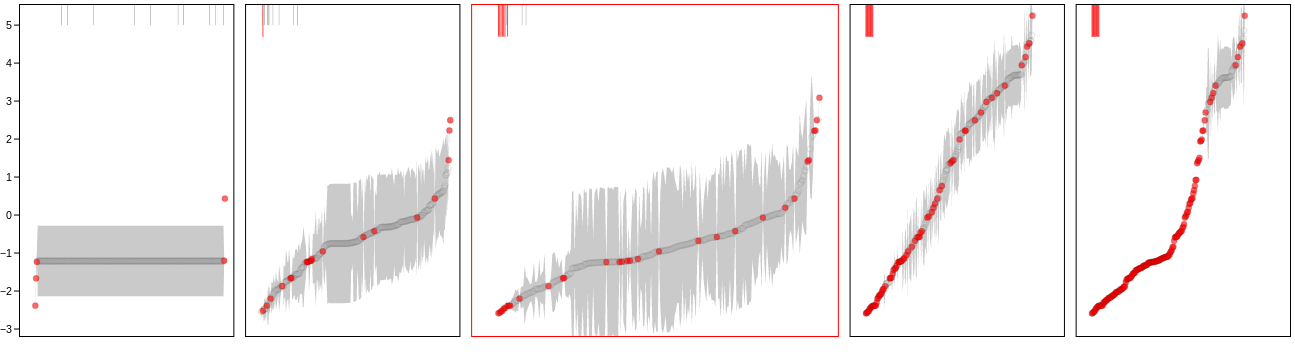

In [12]:
my_plotly_plot(
    figure=fig,
    plot_name=stoich_i + "_" + "al_5_gens_in_row",
    write_html=True,
    write_png=True,
    png_scale=10,
    write_pdf=True,
    )

fig.layout.update(paper_bgcolor="white")
fig.show()

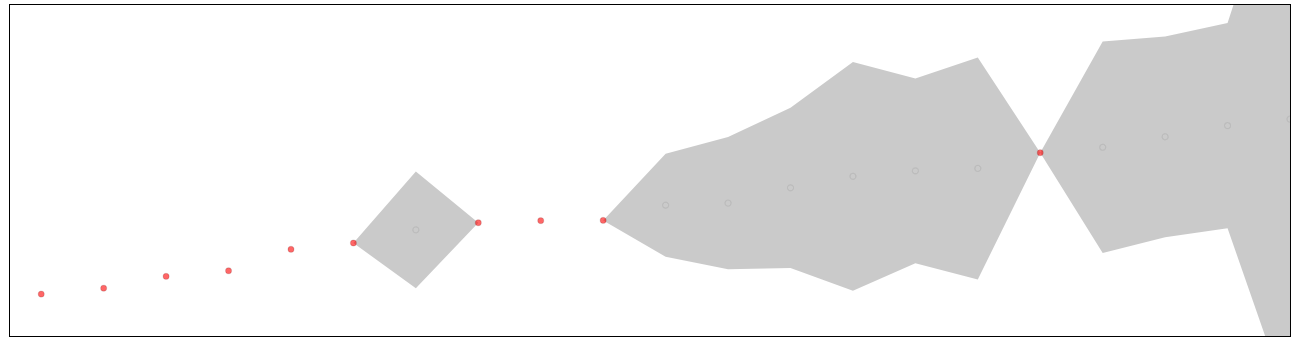

In [13]:
layout = copy.deepcopy(layout)
layout.update(dict(
    xaxis=dict(range=[-0.5, 20]),
    yaxis=dict(range=[-2.7, -1.8]),
    # width=400,
    # width=200,
    # width=202,
    width=200.2,

    # height=300,
    # height=220,
    height=100,
    showlegend=False,
    ))

fig = go.Figure(
    data=traces_list[2],
    layout=layout,
    )

# ##############################################################################
my_plotly_plot(
    figure=fig,
    plot_name=stoich_i + "_" + "al_main_plot_zoomed",
    write_html=True,
    write_png=True,
    png_scale=10,
    write_pdf=True,
    )

fig.layout.update(paper_bgcolor="white")
fig.show()

In [14]:
assert False

AssertionError: 

In [ ]:
# Annotation of inset plot square
annotations = [
    go.layout.Shape(
        type="rect",
        xref="x",
        yref="y",

        x0=-1,
        y0=-2.65,
        x1=16.5,
        y1=-2.2,

        line=dict(
            color="grey",
            width=1.,
            ),
        # fillcolor="LightSkyBlue",
        ),

    ]

In [ ]:
AL_main = al_gen_dict[main_gen]
model_main = AL_main.model
num_systems_0 = model_main.shape[0]

trace_i = ALAnim.get_trace_j(
    AL_main,
    prediction_key="y",
    uncertainty_key="err",
    plot_dft_instead_of_pred=True,
    plot_validation_dft=False,
    # trace_all_dft=True,
    trace_horiz_lines=False,
    internally_order_df=True,
    )

print("len(trace_i):", len(trace_i))
# trace_i = trace_i[0:1]

layout_override = go.Layout(
    width=450,
    height=270,

    xaxis=dict(
        title=dict(
            text="Candidate Space",
            ),
        range=[-10, num_systems_0 + 10],
        showticklabels=True,
        linecolor="red",
        ticks="outside",
        ),

    yaxis=dict(
        title=dict(text="ΔH<sub>f</sub> (eV)"),
        dtick=1.,
        showticklabels=True,
        linecolor="red",
        ),
    
    showlegend=False,

    margin=go.layout.Margin(
        b=20,
        l=20,
        r=10,
        t=10),

#     annotations=annotations,

    )

layout_base_cpy = copy.deepcopy(layout_base)
layout = layout_base_cpy.update(layout_override)

# layout.annotations = annotations
# layout.shapes = annotations

fig = go.Figure(data=trace_i, layout=layout)

fig_main = fig

In [ ]:
my_plotly_plot(
    figure=fig,
    plot_name=stoich_i + "_" + "al_main_plot",
    write_html=True,
    write_png=True,
    png_scale=10,
    write_pdf=True,
    )

fig.show()

# Zoomed-in Plot

In [ ]:
AL_main = al_gen_dict[main_gen]
model_main = AL_main.model
num_systems_0 = model_main.shape[0]


trace_i = ALAnim.get_trace_j(
    AL_main,
    prediction_key="y",
    uncertainty_key="err",
    plot_dft_instead_of_pred=True,
    plot_validation_dft=False,
    # trace_all_dft=True,
    trace_horiz_lines=False,
    internally_order_df=True,
    )

# trace_i = trace_i[0:1]


if stoich_i == "AB3":
    # x_range = [-1, 16.5]
    # y_range = [-2.65, -2.2]

    x_range_inset = [-1, 16.5]
    y_range_inset = [-2.65, -2.2]
elif stoich_i == "AB2":
    # x_range = [-1, 15]
    # y_range = [-2.5844, -1.7545]

    x_range_inset = [-1, 15]
    y_range_inset = [-2.5844, -1.7545]


layout_override = go.Layout(
    width=450 / 2.3,
    height=270 / 2.3,
    margin=go.layout.Margin(
        b=20,
        l=20,
        r=10,
        t=10),
    xaxis=dict(
        showticklabels=False,
        range=x_range_inset,
        ticks="",
        ),
    yaxis=dict(
#         showticklabels=True,
        range=y_range_inset,
        ),
    )

layout_base_cpy = copy.deepcopy(layout_base)
layout = layout_base_cpy.update(layout_override)

fig = go.Figure(data=trace_i, layout=layout)

fig_inset = fig

In [ ]:
my_plotly_plot(
    figure=fig,
    plot_name=stoich_i + "_" + "al_main_plot_zoomed",
    write_html=True,
    write_png=True,
    png_scale=10,
    write_pdf=True,
    )

fig.show()

In [ ]:
figs_dict = {
    "fig_inset": fig_inset,
    "fig_main": fig_main,
    }

# Pickling data ######################################################
import os; import pickle
directory = "out_data"
if not os.path.exists(directory): os.makedirs(directory)
with open(os.path.join(directory, stoich_i + "_" + "figs_dict.pickle"), "wb") as fle:
    pickle.dump(figs_dict, fle)
# #####################################################################

In [ ]:
os.path.join(directory, stoich_i + "_" + "figs_dict.pickle")

In [ ]:
figs_dict["fig_main"]

In [ ]:
# al_output_data_path = os.path.join(
#     os.environ["PROJ_irox"],
#     "workflow/ml_modelling", "00_ml_workflow/190611_new_workflow",
#     "02_gaus_proc/out_data")
# filename_i = "data_dict_" + stoich_i + "_" + custom_name + "_processed.pickle"

# with open(os.path.join(al_output_data_path, filename_i), "rb") as fle:
#     data = pickle.load(fle)

# num_systems_0 = data[0]["model_processed"].shape[0]

In [ ]:
# # #############################################################################
# with open(bulk_dft_data_path, "rb") as fle:
#     df_bulk_dft = pickle.load(fle)
#     df_bulk_dft_orig = copy.deepcopy(df_bulk_dft)

#     sources = ['raul', 'raul_oer']
#     df_bulk_dft = df_bulk_dft[df_bulk_dft["source"].isin(sources)]

# df_bulk_dft.loc[model_i.index].sort_values("energy_pa")

# df_bulk_dft[df_bulk_dft["stoich"] == "AB3"].sort_values("energy_pa")

In [ ]:
# stoich_i = "AB3"
# custom_name = "regular"

# lowest_N_sys_to_track = 10

# generations to plot
# gen_0 = 0
# gen_1 = 2
# gen_2 = 9  # 5/10 top structures found
# gen_3 = 14 # 10/10 top structures found
# gen_4 = "last"

# gens_to_plot = [gen_0, gen_1, gen_2, gen_3, gen_4]

# main_gen = gen_2

In [ ]:
# if stoich_i == "AB3":
#     x_range = [-1, 16.5]
#     y_range = [-2.65, -2.2]
# else:
#     tmp = 42

# # fig.layout.xaxis["range"] = [-1, 12]
# # fig.layout.yaxis["range"] = [-6.4772, -6.41]

# fig.layout.xaxis["range"] = x_range
# fig.layout.yaxis["range"] = y_range

In [ ]:
# # #############################################################################
# import pickle; import os
# path_i = os.path.join(
#     os.environ["HOME"],
#     "__temp__",
#     "TEMP.pickle")
# with open(path_i, "rb") as fle:
#     model_0 = pickle.load(fle)
# # #############################################################################


# data = []

# for i_ind, row_i in model_0.iterrows():
#     tmp1 = 42

#     Y_main = row_i["Y_main"]
#     x_ind = row_i["x_axis_ind"]

#     trace_i = go.Scatter(
#         mode="lines",
#         x=[x_ind, x_ind],
#         y=[Y_main, 6],
#         )

#     data.append(trace_i)


# i_ind